In [ ]:
import torch.nn.functional as F
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd 
import pickle  
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power


In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        
        #forget gate

        self.W_fh = nn.Parameter(torch.zeros(1).uniform_(0,1))
        self.W_fx = nn.Parameter(torch.zeros(1).uniform_(0,1))
        self.bf = nn.Parameter(torch.zeros(1).uniform_(0,1))
        #input gate
        self.W_ih = nn.Parameter(torch.zeros(1).uniform_(0,1))
        self.W_ix = nn.Parameter(torch.zeros(1).uniform_(0,1))
        self.bi = nn.Parameter(torch.zeros(1).uniform_(0,1))
        
        #output gate 
        self.W_oh = nn.Parameter(torch.zeros(1).uniform_(0,1))
        self.W_ox = nn.Parameter(torch.zeros(1).uniform_(0,1))
        self.bo = nn.Parameter(torch.zeros(1).uniform_(0,1))
        
        #c
        self.W_ch =  nn.Parameter(torch.zeros(1).uniform_(0,1))
        self.W_cx = nn.Parameter(torch.zeros(1).uniform_(0,1))
        self.bc = nn.Parameter(torch.zeros(1).uniform_(0,1))

    def forward(self,x,h,c):  
            f_t = torch.sigmoid(torch.matmul(self.W_fh,h)+torch.matmul(self.W_fx,x)+self.bf)
            i_t = torch.sigmoid(torch.matmul(self.W_ih,h)+torch.matmul(self.W_ix,x)+self.bi)
            c_1= torch.tanh(torch.matmul(self.W_ch,h)+torch.matmul(self.W_cx,x)+self.bc)
            c_t = f_t*c+c_1*i_t
            o_t = torch.sigmoid(torch.matmul(self.W_oh,h)+torch.matmul(self.W_ox,x)+self.bo)
            h_t = o_t*torch.tanh(c_t)
            return h_t,c_t

In [ ]:
X = np.linspace(1,10,10**3)
y_org= np.sin(X)**2 + (6*np.cos(2*X)**2)/X

In [ ]:
y = y_org + np.abs(np.random.normal(0,1/2, len(y_org)))

y_org = (y_org)/y_org.max()
y = y/y.max()

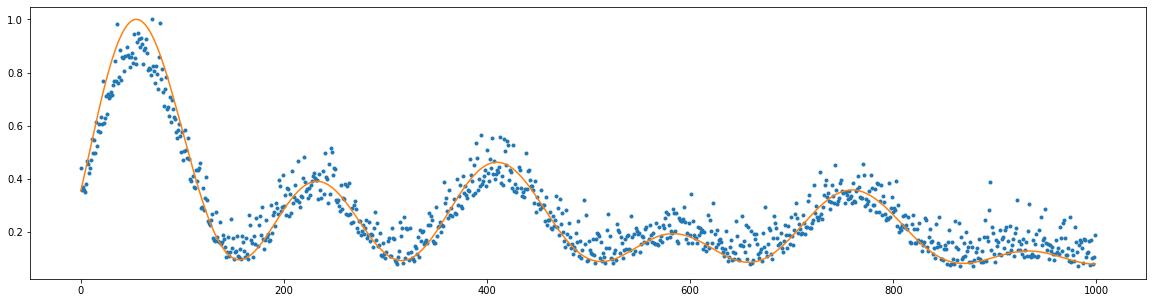

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(y, marker = ".", linestyle = "None")
ax.plot(y_org)

In [ ]:
val = y.reshape(int(len(y)/5), 5)

lab = np.array([i[0] for i in val][1:])
lab = torch.tensor(lab).float().reshape(len(lab),1)

ls_3 = torch.Tensor(y).reshape([len(y),1]).float()

In [ ]:
LS = LSTM()
loss = nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(list(LS.parameters()), lr=0.05)

In [ ]:
convergencia = []
costo = []
val_loss_list = []

for epoch in range(100):

# ENTRENAMIENTO DE LA ESTRUCTURA LSTM
  model.train()

  h=torch.zeros(1).float()
  c=torch.zeros(1).float()

  pred=torch.zeros(len(lab)).float()
  
  h_1=torch.zeros(1).float()
  c_1=torch.zeros(1).float()

  for p in range(len(lab)):
    h=torch.zeros(1).float()
    c=torch.zeros(1).float()

    h=h_1
    c=c_1

    for t in range(0,5):
      h,c= LS(ls_3[t+5*p],h,c)

    pred[p]=h
    
    h_1=h.detach()
    c_1=c.detach()
    
    cost_1 = loss(h, lab[p])
    optimizer.zero_grad()
    cost_1.backward()
    optimizer.step()

# VALIDACIÓN
    model.eval()
    


# VISUALIZACIÓN
  if epoch == 0:
    init_error = cost_1.item()

  if epoch % 1 == 0:
     print("Iteración: {}, Costo: {}, Reducción: {} %".format(epoch, round(cost_1.item(),2), round(cost_1.item()/init_error*100,2) ))
     convergencia.append(pred.detach().numpy())
     costo.append(cost_1.item())

Iteración: 0, Costo: 0.0, Reducción: 100.0 %
Iteración: 1, Costo: 0.0, Reducción: 26.53 %
Iteración: 2, Costo: 0.0, Reducción: 6.67 %
Iteración: 3, Costo: 0.0, Reducción: 1.19 %
Iteración: 4, Costo: 0.0, Reducción: 0.03 %
Iteración: 5, Costo: 0.0, Reducción: 0.19 %
Iteración: 6, Costo: 0.0, Reducción: 0.72 %
Iteración: 7, Costo: 0.0, Reducción: 1.29 %
Iteración: 8, Costo: 0.0, Reducción: 1.8 %
Iteración: 9, Costo: 0.0, Reducción: 2.25 %
Iteración: 10, Costo: 0.0, Reducción: 2.62 %
Iteración: 11, Costo: 0.0, Reducción: 2.95 %
Iteración: 12, Costo: 0.0, Reducción: 3.23 %
Iteración: 13, Costo: 0.0, Reducción: 3.48 %
Iteración: 14, Costo: 0.0, Reducción: 3.72 %
Iteración: 15, Costo: 0.0, Reducción: 3.93 %
Iteración: 16, Costo: 0.0, Reducción: 4.14 %
Iteración: 17, Costo: 0.0, Reducción: 4.33 %
Iteración: 18, Costo: 0.0, Reducción: 4.52 %
Iteración: 19, Costo: 0.0, Reducción: 4.71 %
Iteración: 20, Costo: 0.0, Reducción: 4.89 %
Iteración: 21, Costo: 0.0, Reducción: 5.06 %
Iteración: 22, Cost

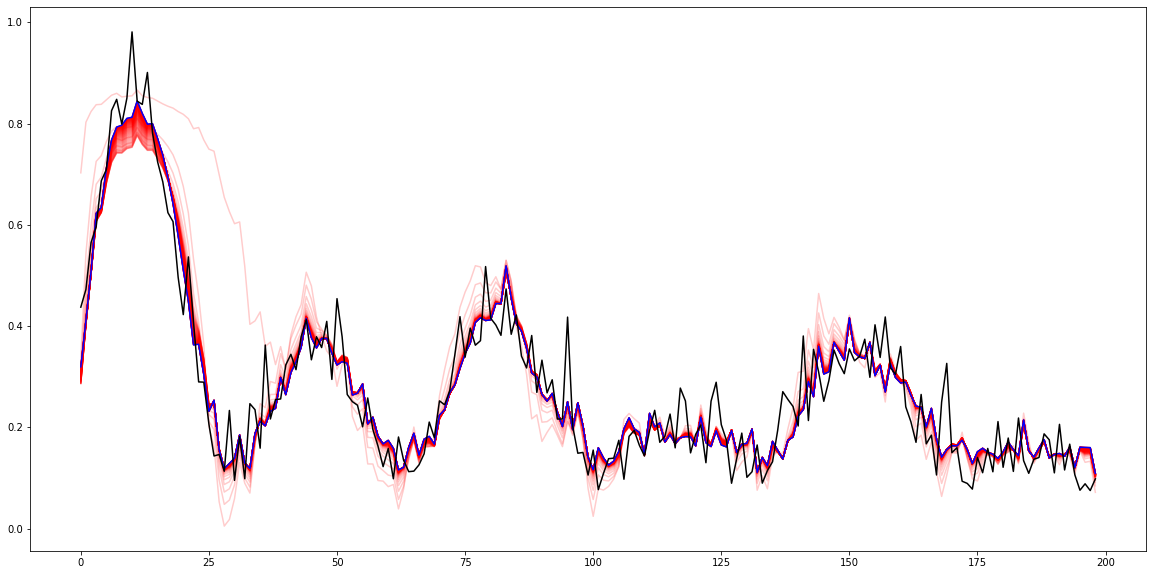

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))

for i in convergencia:
  ax.plot(i, alpha = 0.2, color = "red")

ax.plot(convergencia[-1], alpha = 1, color = "blue")
ax.plot(lab, color = "black", alpha= 1)